In [1]:

!pip install textstat
!pip install wordcloud
!pip install textblob
!pip install missingno
!pip install spacy
!pip install nltk
!pip install gensim


In [2]:
!pip install protobuf==3.20.*

In [3]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
#Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import warnings
 
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

import re
import gensim

from tqdm import tqdm
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# Load the language model
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')


stop=set(stopwords.words('english'))
plt.style.use('seaborn')


from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="1"></a>
    
<font size="+2" color="indigo"><b>1. Data</b></font><br>

In [5]:


#not an API, Twitter API solely for obtaining real-time data.

df=pd.read_csv('./twitter.csv', encoding = "ISO-8859-1")
df=df.dropna()
df

,text,Sentiment
0,"RT @NorthmanTrader: $SPX 10,000.\nNo growth re...",Neutral
1,$MRO Possible gap fill to $6.76 today with OPE...,Neutral
2,The race to 50 Million subscribers... \n- $AMZ...,Neutral
3,RT @LMT978: $SPX is 19% off the high and +25% ...,Neutral
4,RT @RedDogT3: $spx keeps holding 2761 as weake...,Negative
...,...,...
22503,@Matt_Cochrane7 Definitely $AAPL. Even worse. ...,Negative
22504,RT @TrendSpider: $GOOG #GOOG Hard bounce out o...,Neutral
22505,RT @joepete58: I guess Iâm lucky I did Apple...,Positive
22506,$MSFT Microsoft has been resting and consolida...,Positive


In [6]:

df=df[['text','Sentiment']]
df.head()

,text,Sentiment
0,"RT @NorthmanTrader: $SPX 10,000.\nNo growth re...",Neutral
1,$MRO Possible gap fill to $6.76 today with OPE...,Neutral
2,The race to 50 Million subscribers... \n- $AMZ...,Neutral
3,RT @LMT978: $SPX is 19% off the high and +25% ...,Neutral
4,RT @RedDogT3: $spx keeps holding 2761 as weake...,Negative


In [7]:

print(df.head())
print("\n")
print(df.info())

                                                text Sentiment
0  RT @NorthmanTrader: $SPX 10,000.\nNo growth re...   Neutral
1  $MRO Possible gap fill to $6.76 today with OPE...   Neutral
2  The race to 50 Million subscribers... \n- $AMZ...   Neutral
3  RT @LMT978: $SPX is 19% off the high and +25% ...   Neutral
4  RT @RedDogT3: $spx keeps holding 2761 as weake...  Negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22508 entries, 0 to 22507
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22508 non-null  object
 1   Sentiment  22508 non-null  object
dtypes: object(2)
memory usage: 351.8+ KB
None


In [8]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (22508, 2)


In [9]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)


Null Values in each column:
    column name  Total missing  Percent missing
0         text              0              0.0
1    Sentiment              0              0.0


<AxesSubplot:>

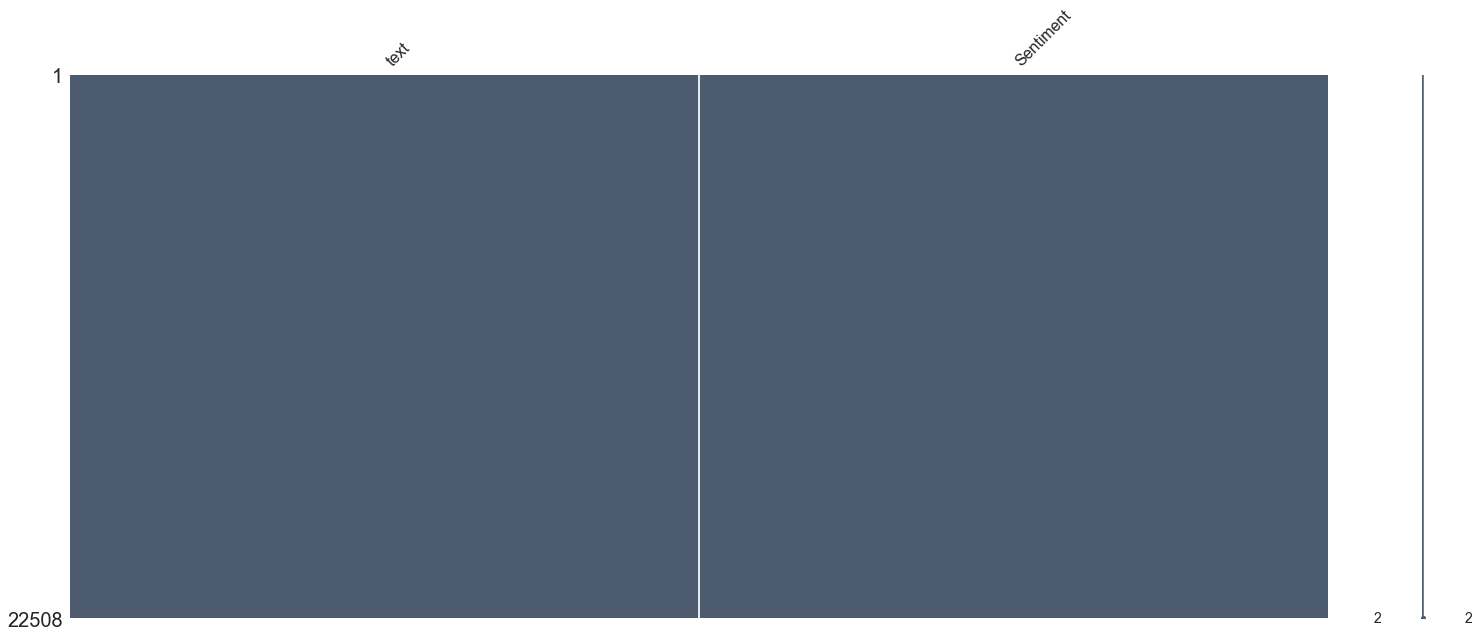

In [10]:
#Missing data as white lines 
import missingno as msno
msno.matrix(df,color=(0.3,0.36,0.44))

#### Null values in location

In [11]:
print('Total headlines in this data: {}'.format(df.shape[0]))
print('Total Unique Users in this data: {}'.format(df['Sentiment'].nunique()))

Total headlines in this data: 22508
Total Unique Users in this data: 3


In [12]:
print(df.Sentiment.unique())
print(df.Sentiment.value_counts())

['Neutral' 'Negative' 'Positive']
Negative    7508
Neutral     7500
Positive    7500
Name: Sentiment, dtype: int64


In [13]:

df.Sentiment.value_counts()
    

Negative    7508
Neutral     7500
Positive    7500
Name: Sentiment, dtype: int64

# EDA, Metafeatures & Viz

<a id="2"></a>
    
<font size="+2" color="indigo"><b>2. Class Distribution</b></font><br>


In [14]:
class_df = df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Sentiment,text
0,Negative,7508
1,Neutral,7500
2,Positive,7500


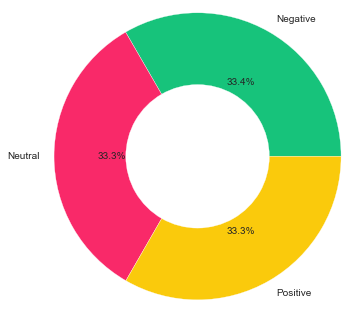

In [15]:
percent_class=class_df.text
labels= class_df.Sentiment

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()



In [16]:


train, test = train_test_split(df, test_size=0.2, random_state=25)


## The colors used above will represent the classes ahead.

In [17]:
fig=make_subplots(1,2,subplot_titles=('Train set','Test set'))
x=train.Sentiment.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='train'),row=1,col=1)
x=test.Sentiment.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='test'),row=1,col=2)

#### Same pattern of uneven distribution in both train and test data



<a id="3"></a>
    
<font size="+2" color="indigo"><b>3. Number of characters</b></font><br>


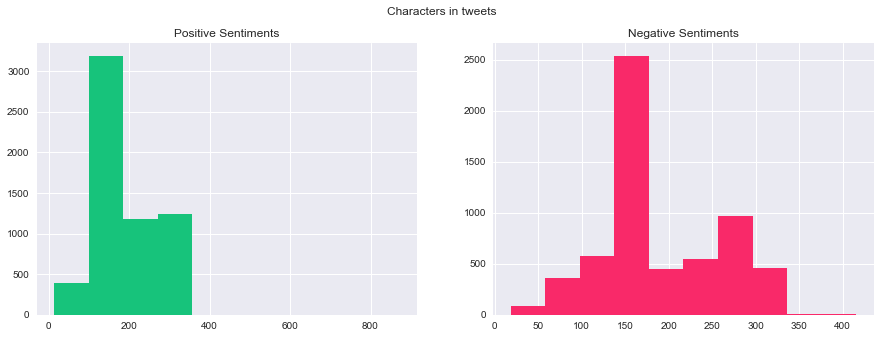

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

tweet_len=train[train['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=train[train['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')


fig.suptitle('Characters in tweets')
plt.show()



<a id="4"></a>
    
<font size="+2" color="indigo"><b>4. Number of words in a Headline</b></font><br>





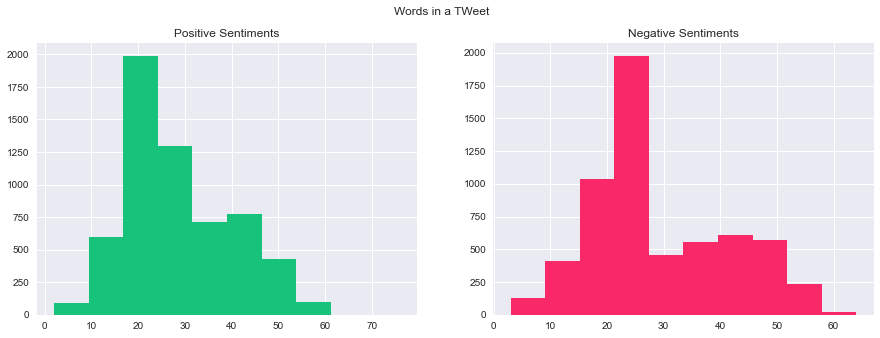

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

tweet_len=train[train['Sentiment']=="Positive"]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')


tweet_len=train[train['Sentiment']=="Negative"]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')


fig.suptitle('Words in a TWeet')
plt.show()



<a id="5"></a>
    
<font size="+2" color="indigo"><b>5. Average word length in a Headline</b></font><br>






Text(0.5, 0.98, 'Average word length in each Twitter')

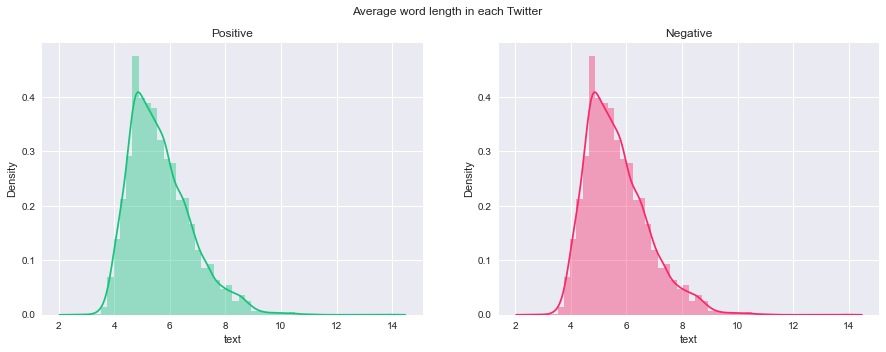

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

word=train[train['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Positive')


word=train[train['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#F92969')
ax2.set_title('Negative')


fig.suptitle('Average word length in each Twitter')



<a id="6"></a>
    
<font size="+2" color="indigo"><b>6. Common Stopwords in the Headline</b></font><br>



In [21]:
def create_corpus(target):
    corpus=[]
    
    for x in train[train['Sentiment']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [22]:
np.array(stop)

array({'y', 'over', "won't", 'these', 'your', 'which', 'mightn', 'or', 'me', 'their', "weren't", 'd', 'any', "you've", 'when', 'the', 'as', 'into', 'not', 'than', "wouldn't", 'himself', "you'll", 'been', "she's", 'more', 'they', 'having', 'can', 'how', 'ours', 'yourself', "mustn't", 'until', 'all', 'hers', "you'd", "shouldn't", 'have', 'itself', 'those', 'while', "wasn't", 'did', 'off', 'before', "you're", 'wouldn', 'will', 'but', 'didn', 'ourselves', "couldn't", 'don', 'few', 'above', 'll', 'no', 'most', 'on', 'further', 'myself', 'in', 'for', "haven't", 'yours', 'if', "doesn't", "needn't", 'am', 'below', 'of', 'once', 'here', 't', 'about', 'who', 'm', 'so', 'some', 'that', 'same', 'his', 'by', 'only', 'hadn', 'are', 'nor', 'yourselves', 's', 'too', 'isn', 'during', 'weren', 'very', 'shan', 'each', 'why', 'haven', "didn't", "that'll", 'both', 'against', 'was', 'doing', "should've", 'other', 'themselves', 'a', 'there', 'where', 'were', "mightn't", 'my', 'now', 'mustn', 'she', "hadn't",

comment_words {"won't", 'over', 'these', 'your', "where's", 'which', 'or', 'me', 'their', "weren't", 'any', 'k', 'when', 'as', 'into', 'than', 'not', 'the', "wouldn't", "she'll", 'himself', 'www', "you'll", 'been', "she's", "i'm", 'more', "i'd", 'they', 'having', 'can', 'how', "let's", "they've", 'ours', 'yourself', "mustn't", 'since', 'until', 'all', 'hers', "you'd", "shouldn't", 'have', 'itself', "they're", 'those', "wasn't", "we've", 'while', 'did', 'off', 'before', "you're", "why's", 'but', "couldn't", 'ourselves', 'few', 'above', 'however', "we'd", 'otherwise', 'no', 'most', 'hence', 'further', 'myself', 'in', 'for', 'on', "he'd", "haven't", "i've", 'yours', "doesn't", 'if', 'am', 'below', 'of', 'once', 'here', 'about', "that's", "here's", 'who', 'so', "they'll", 'same', 'some', 'that', 'his', "we'll", "when's", 'by', 'only', 'ought', 'are', 'nor', 'else', 'yourselves', "what's", 'too', 'during', "i'll", 'very', 'each', 'why', "didn't", 'both', 'against', 'get', "he's", 'doing', '

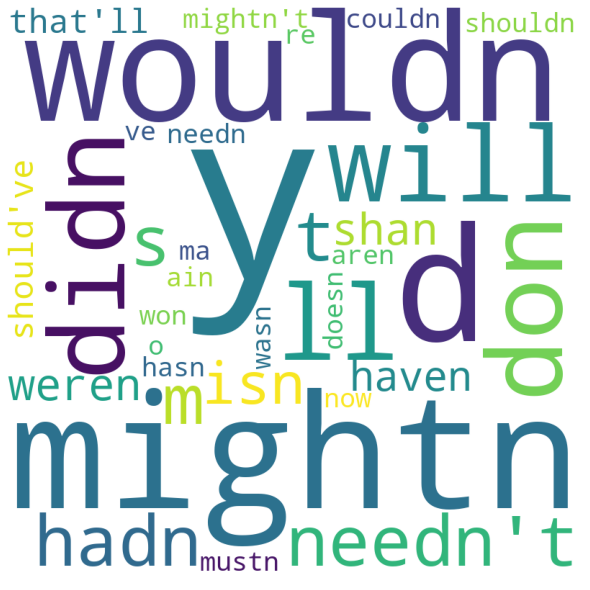

In [23]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  

for val in stop: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
print("comment_words",stopwords)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


<BarContainer object of 10 artists>

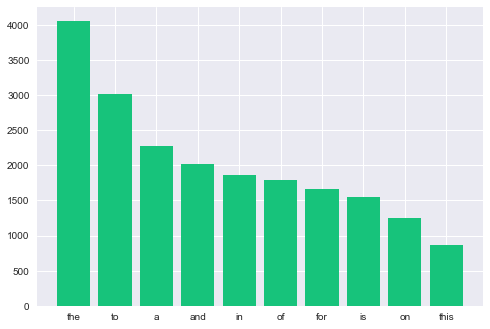

In [24]:
corpus=create_corpus("Positive")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

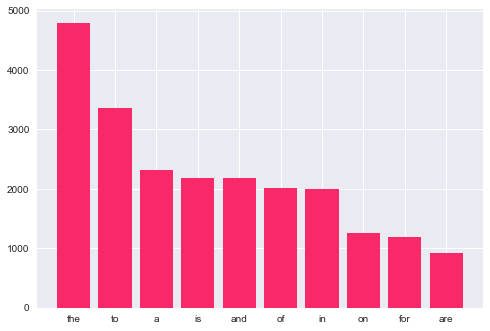

In [25]:
corpus=create_corpus("Negative")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

#### A lot stopwords are present. Require preprocessing



<a id="7"></a>
    
<font size="+2" color="indigo"><b>7. Punctuations</b></font><br>

 




<BarContainer object of 22 artists>

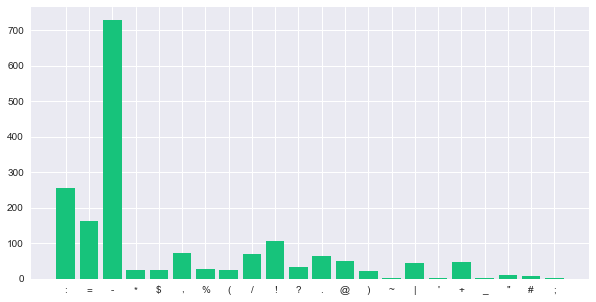

In [26]:
plt.figure(figsize=(10,5))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

<BarContainer object of 24 artists>

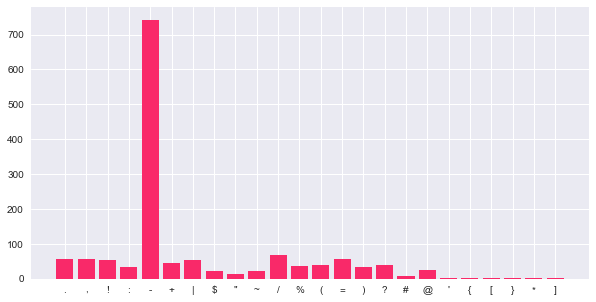

In [27]:
plt.figure(figsize=(10,5))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

#### More cleaning to be done



<a id="8"></a>
    
<font size="+2" color="indigo"><b>8. Common Words</b></font><br>



In [28]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

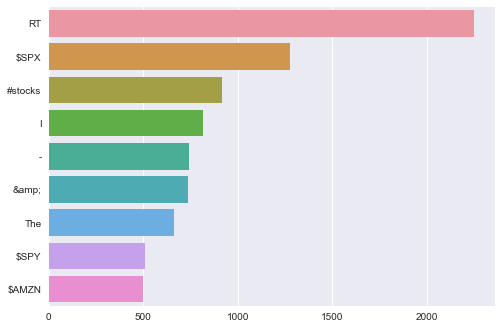

In [29]:
sns.barplot(x=y,y=x)

#### Common words feature punctuations, we need extensive data cleaning



<a id="9"></a>
    
<font size="+2" color="indigo"><b>9. Hashtags</b></font><br>


In [30]:
def find_hash(text):
    text=str(text)
    #print(text)
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
df['hash']=df['text'].apply(lambda x:find_hash(x))
temp=df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
df['text']=df['text'].astype(str)
df

,text,Sentiment,hash
0,"RT @NorthmanTrader: $SPX 10,000.\nNo growth re...",Neutral,
1,$MRO Possible gap fill to $6.76 today with OPE...,Neutral,
2,The race to 50 Million subscribers... \n- $AMZ...,Neutral,
3,RT @LMT978: $SPX is 19% off the high and +25% ...,Neutral,
4,RT @RedDogT3: $spx keeps holding 2761 as weake...,Negative,
...,...,...,...
22503,@Matt_Cochrane7 Definitely $AAPL. Even worse. ...,Negative,
22504,RT @TrendSpider: $GOOG #GOOG Hard bounce out o...,Neutral,GOOG
22505,RT @joepete58: I guess Iâm lucky I did Apple...,Positive,
22506,$MSFT Microsoft has been resting and consolida...,Positive,


#### While lower casing is required, we can see that hashtags contain keywords related to coronavirus 



<a id="11"></a>
    
<font size="+2" color="indigo"><b>11. Pre-processing</b></font><br>



In [31]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df['text']=df['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['text']=df['text'].apply(lambda x:remove_html(x))



In [32]:

# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
df['text']=df['text'].apply(lambda x:lower(x))


# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df['text']=df['text'].apply(lambda x:remove_num(x))



In [33]:

#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df['text']=df['text'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text']=df['text'].apply(lambda x:remove_stopwords(x))



In [34]:
#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['text']=df['text'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['text']=df['text'].apply(lambda x:remove_hash(x))


In [35]:

#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
def stemming(text):
    ps = PorterStemmer()
    
    return" ".join([ps.stem(word) for word in str(text).split()])
    
def lemmatizing(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    
    return" ".join([wordnet_lemmatizer.lemmatize(word) for word in str(text).split()])
df['text']=df['text'].apply(lambda x:remove_space(x))
df['text']=df['text'].apply(lambda x:stemming(x))




<a id="12"></a>
    
<font size="+2" color="indigo"><b>12. Wordclouds</b></font><br>


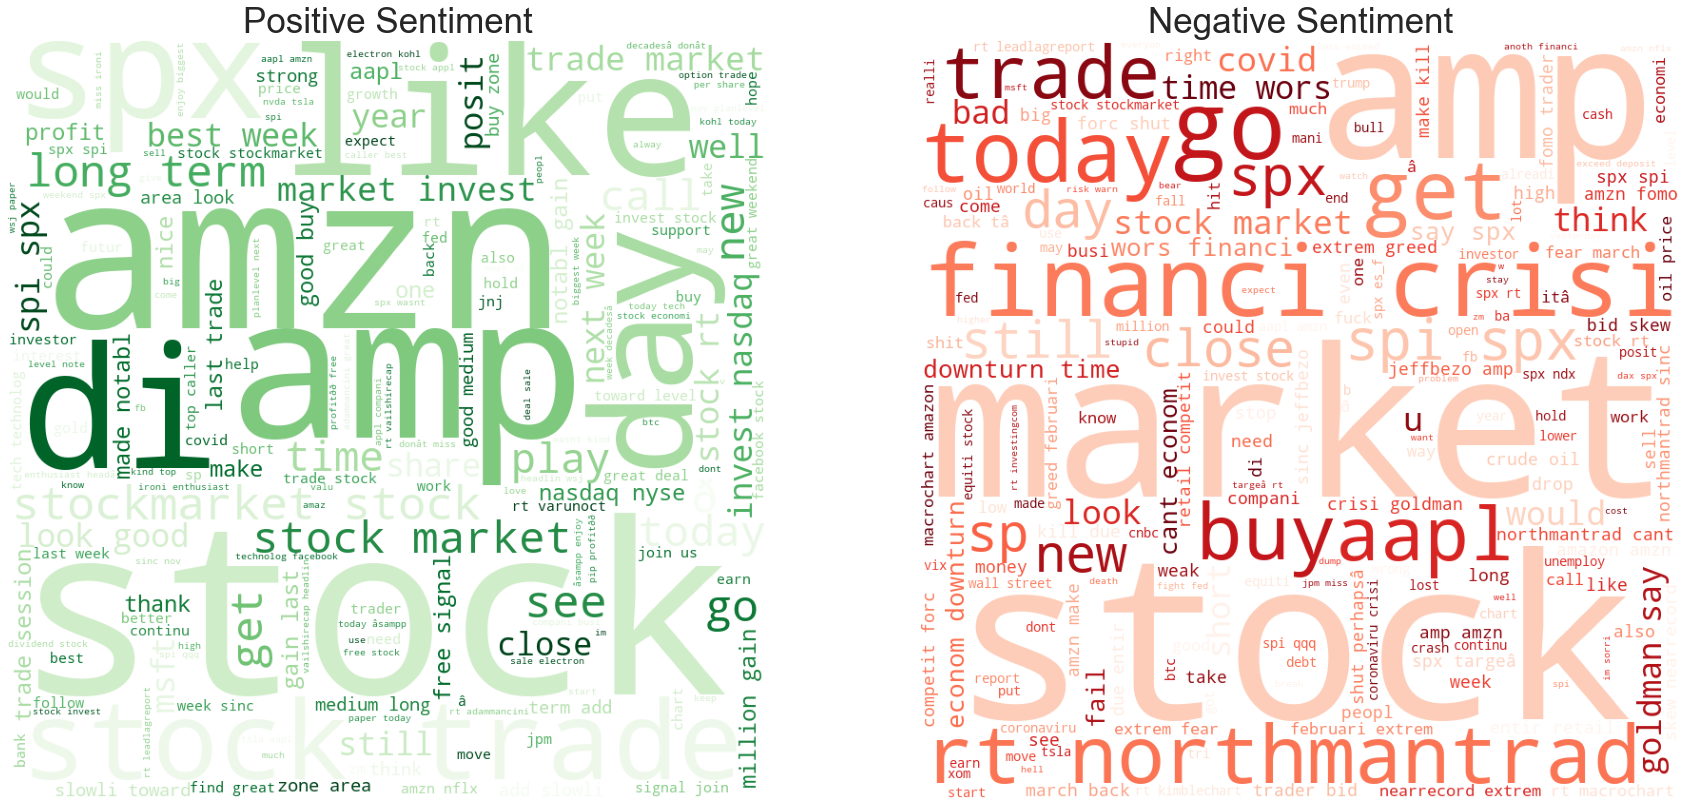

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

df_pos = df[df["Sentiment"]=="Positive"]
df_neg = df[df["Sentiment"]=="Negative"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);





In [37]:
del df_pos
del df_neg




<a id="13"></a>
    
<font size="+2" color="indigo"><b>13. N-grams</b></font><br>


## Unigrams

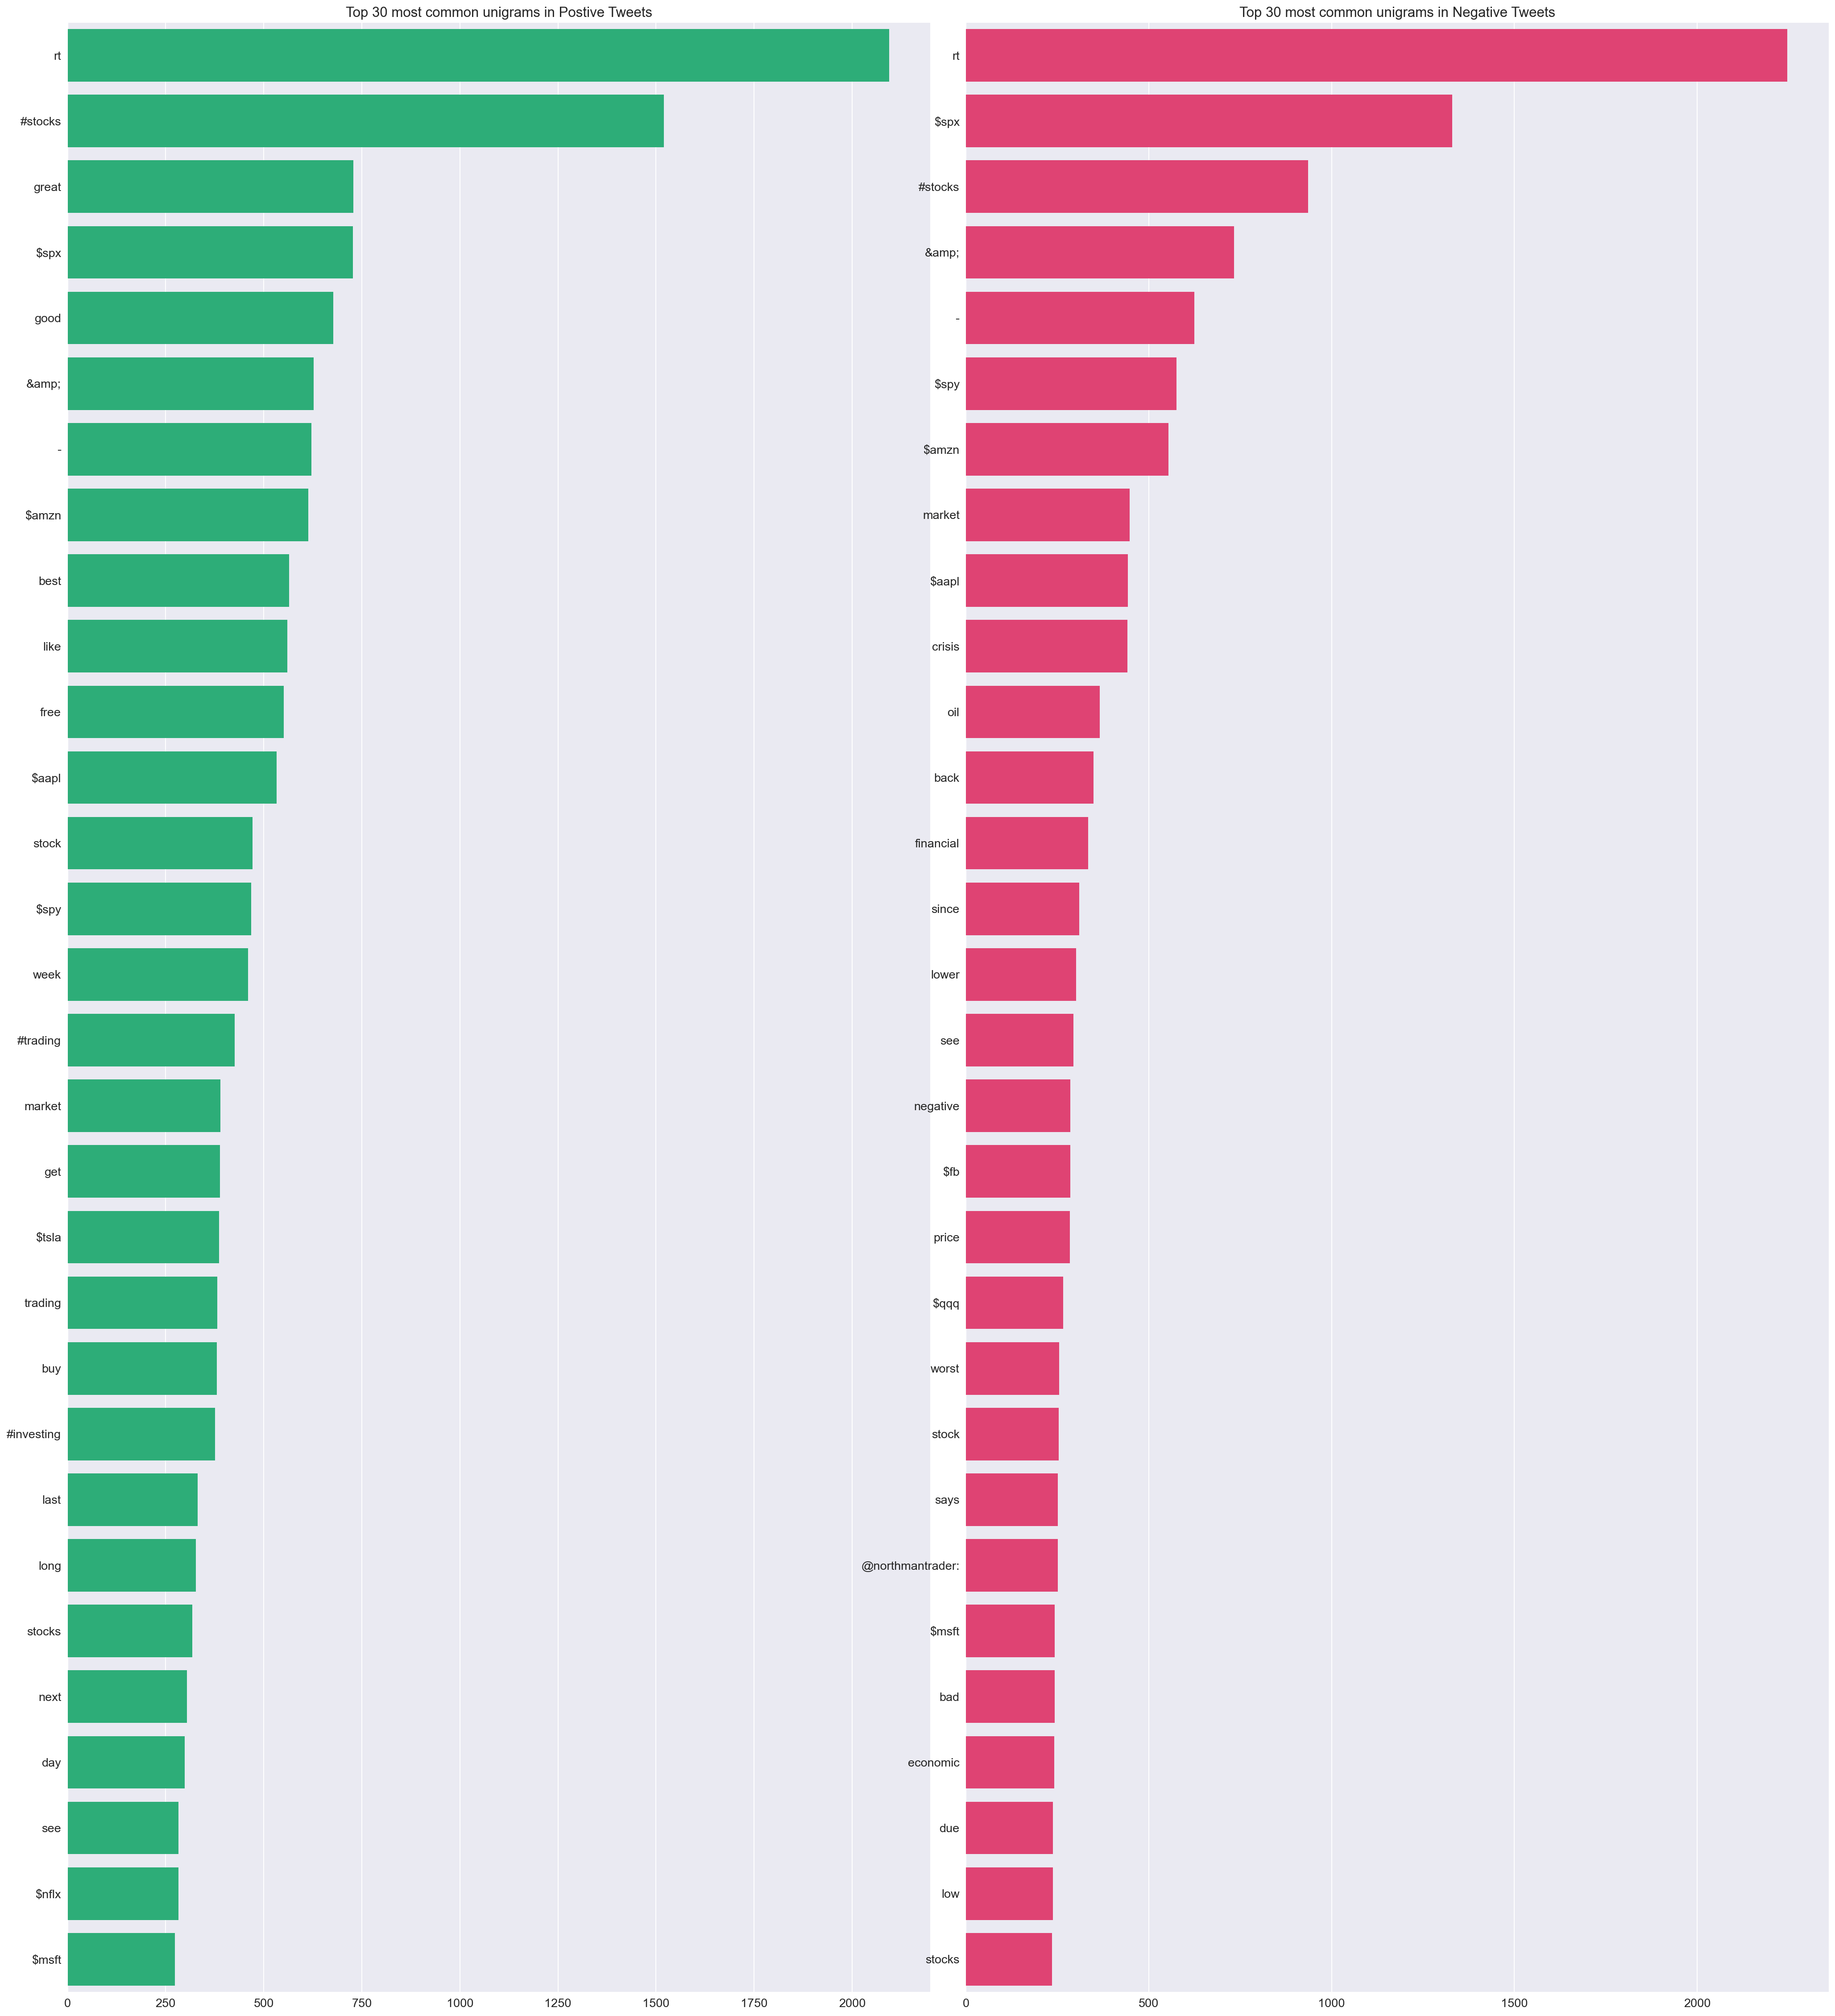

In [38]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30



positive= train["Sentiment"]== "Positive"
negative= train["Sentiment"]== "Negative"


positive_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

# Unigrams
for tweet in train[positive]['text']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
        
for tweet in train[negative]['text']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
      
        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='#F92969')



for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=15)

plt.show()

## Bi grams

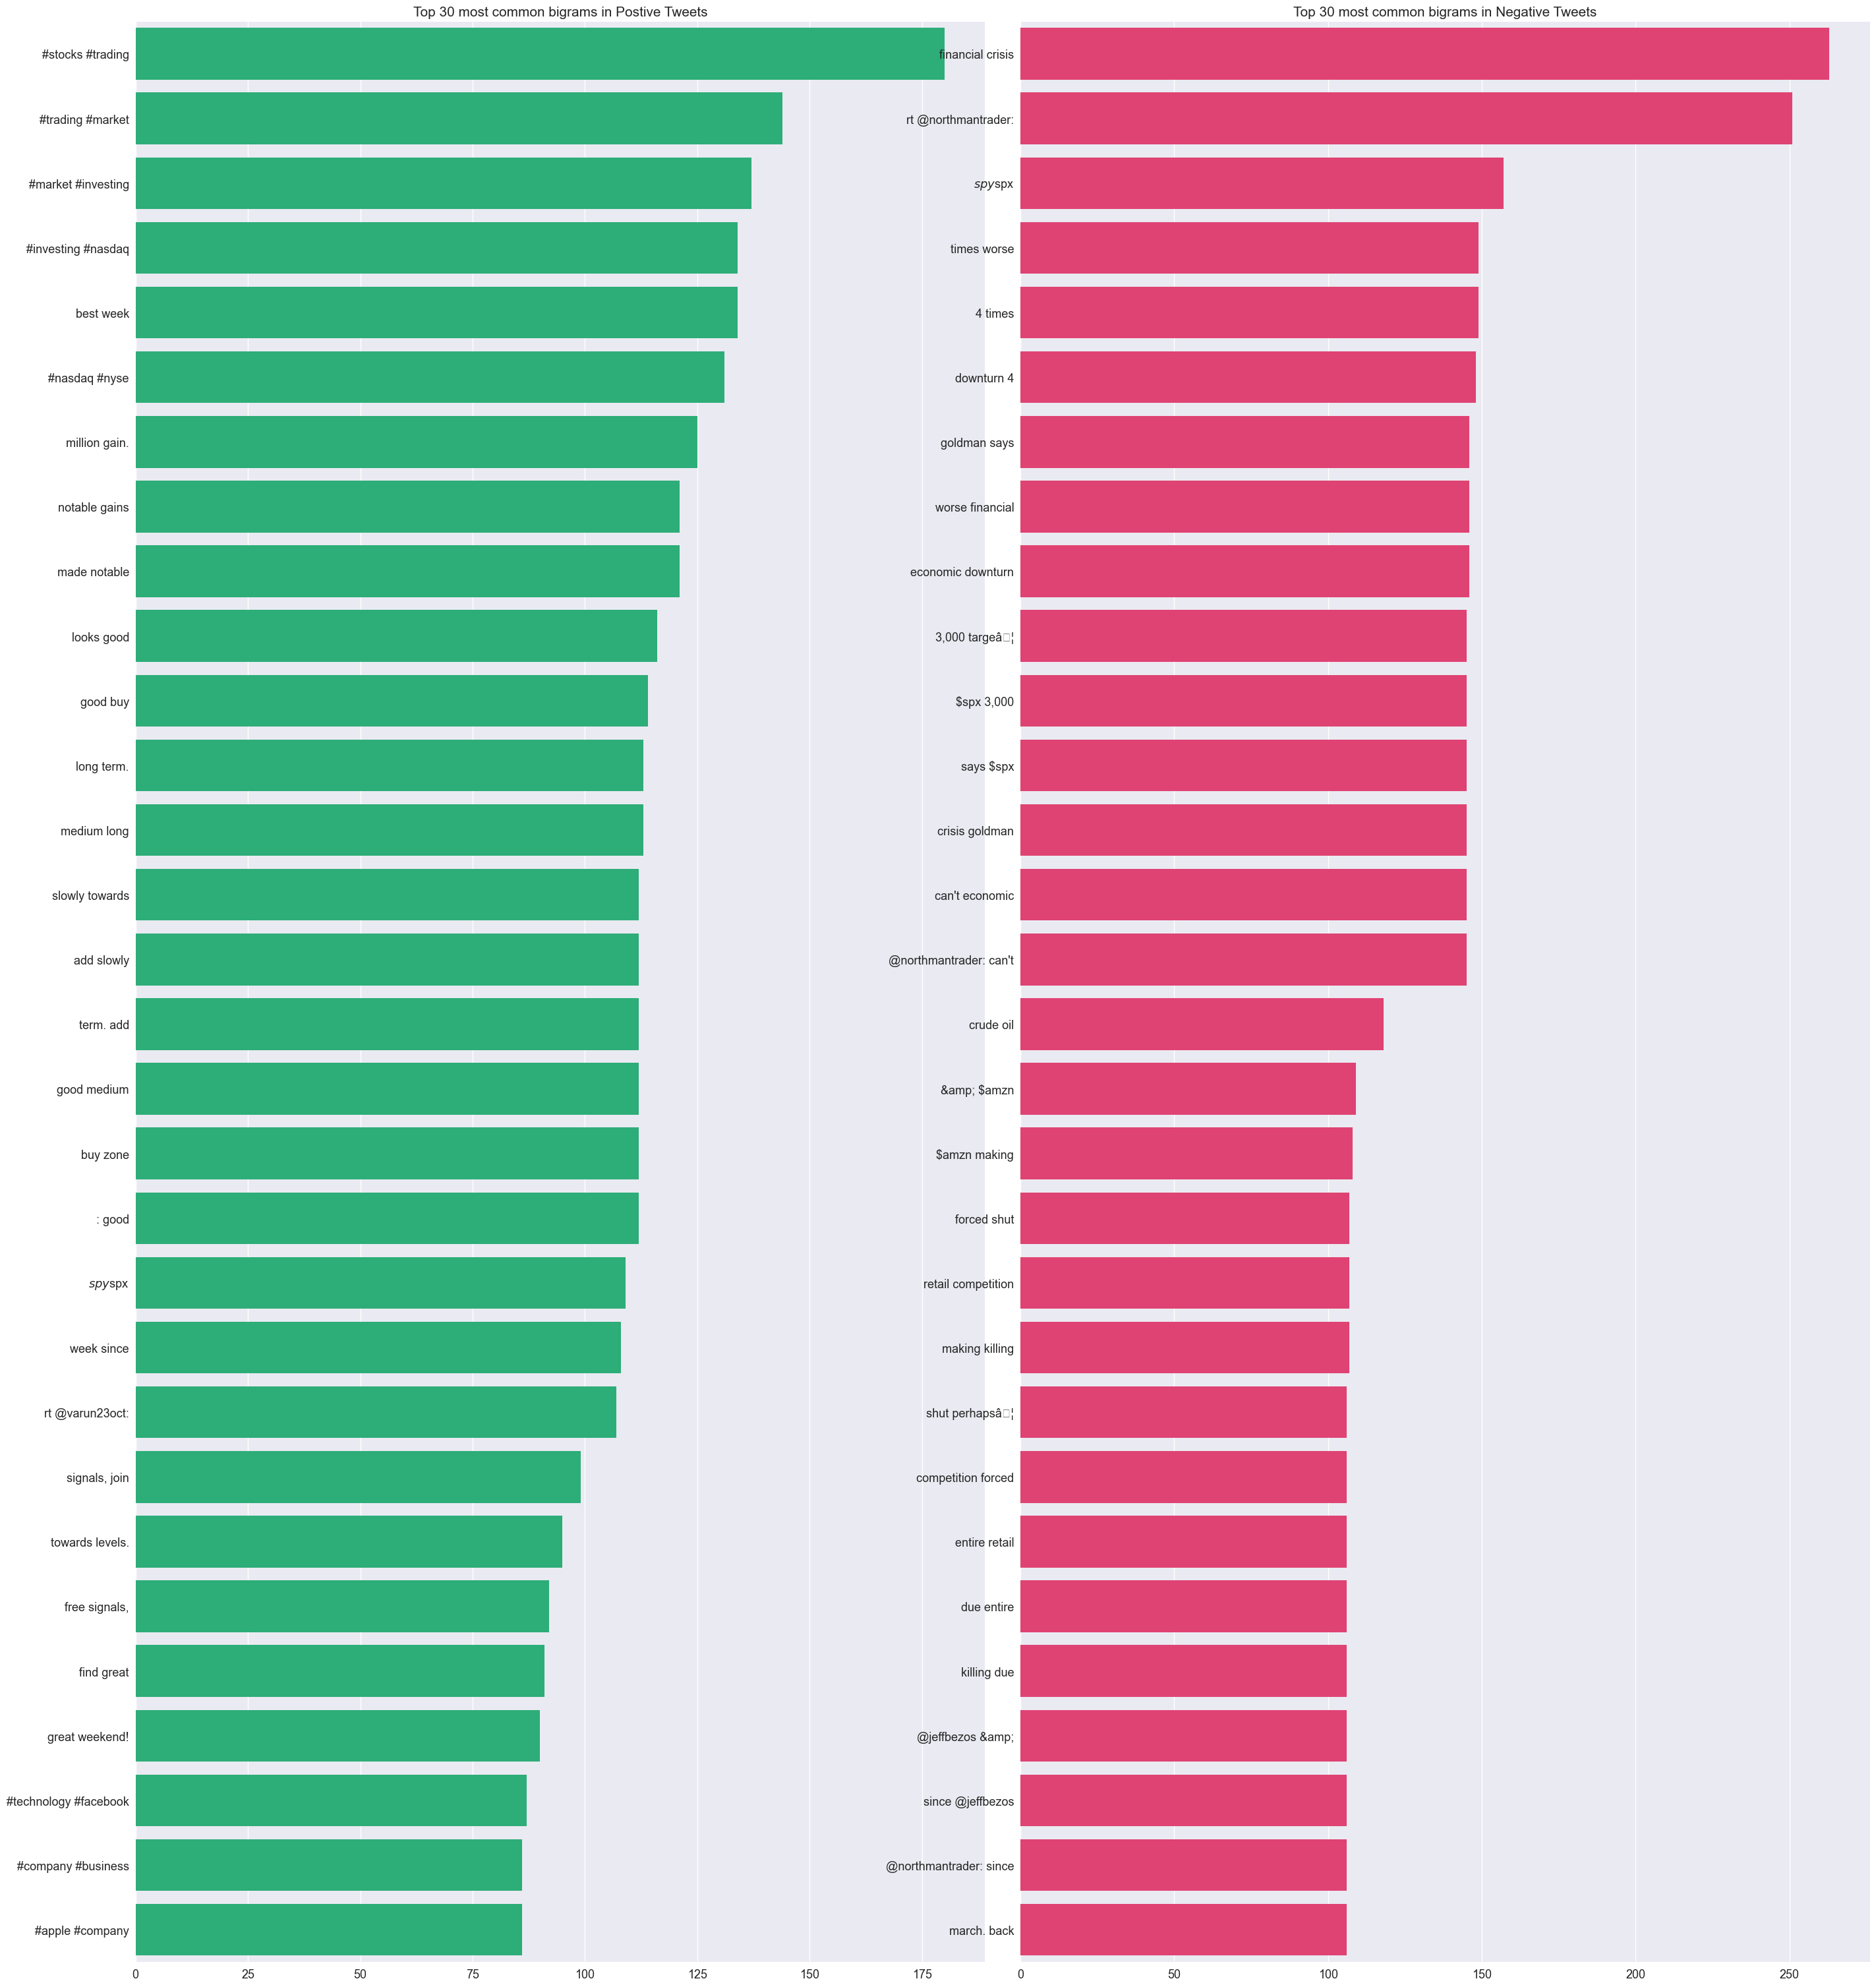

In [39]:
# Bigrams
positive_bigrams = defaultdict(int)

negative_bigrams = defaultdict(int)

for tweet in train[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1
        
for tweet in train[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1
        

        
df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='#F92969')


for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=15)

plt.show()

# Tri-grams

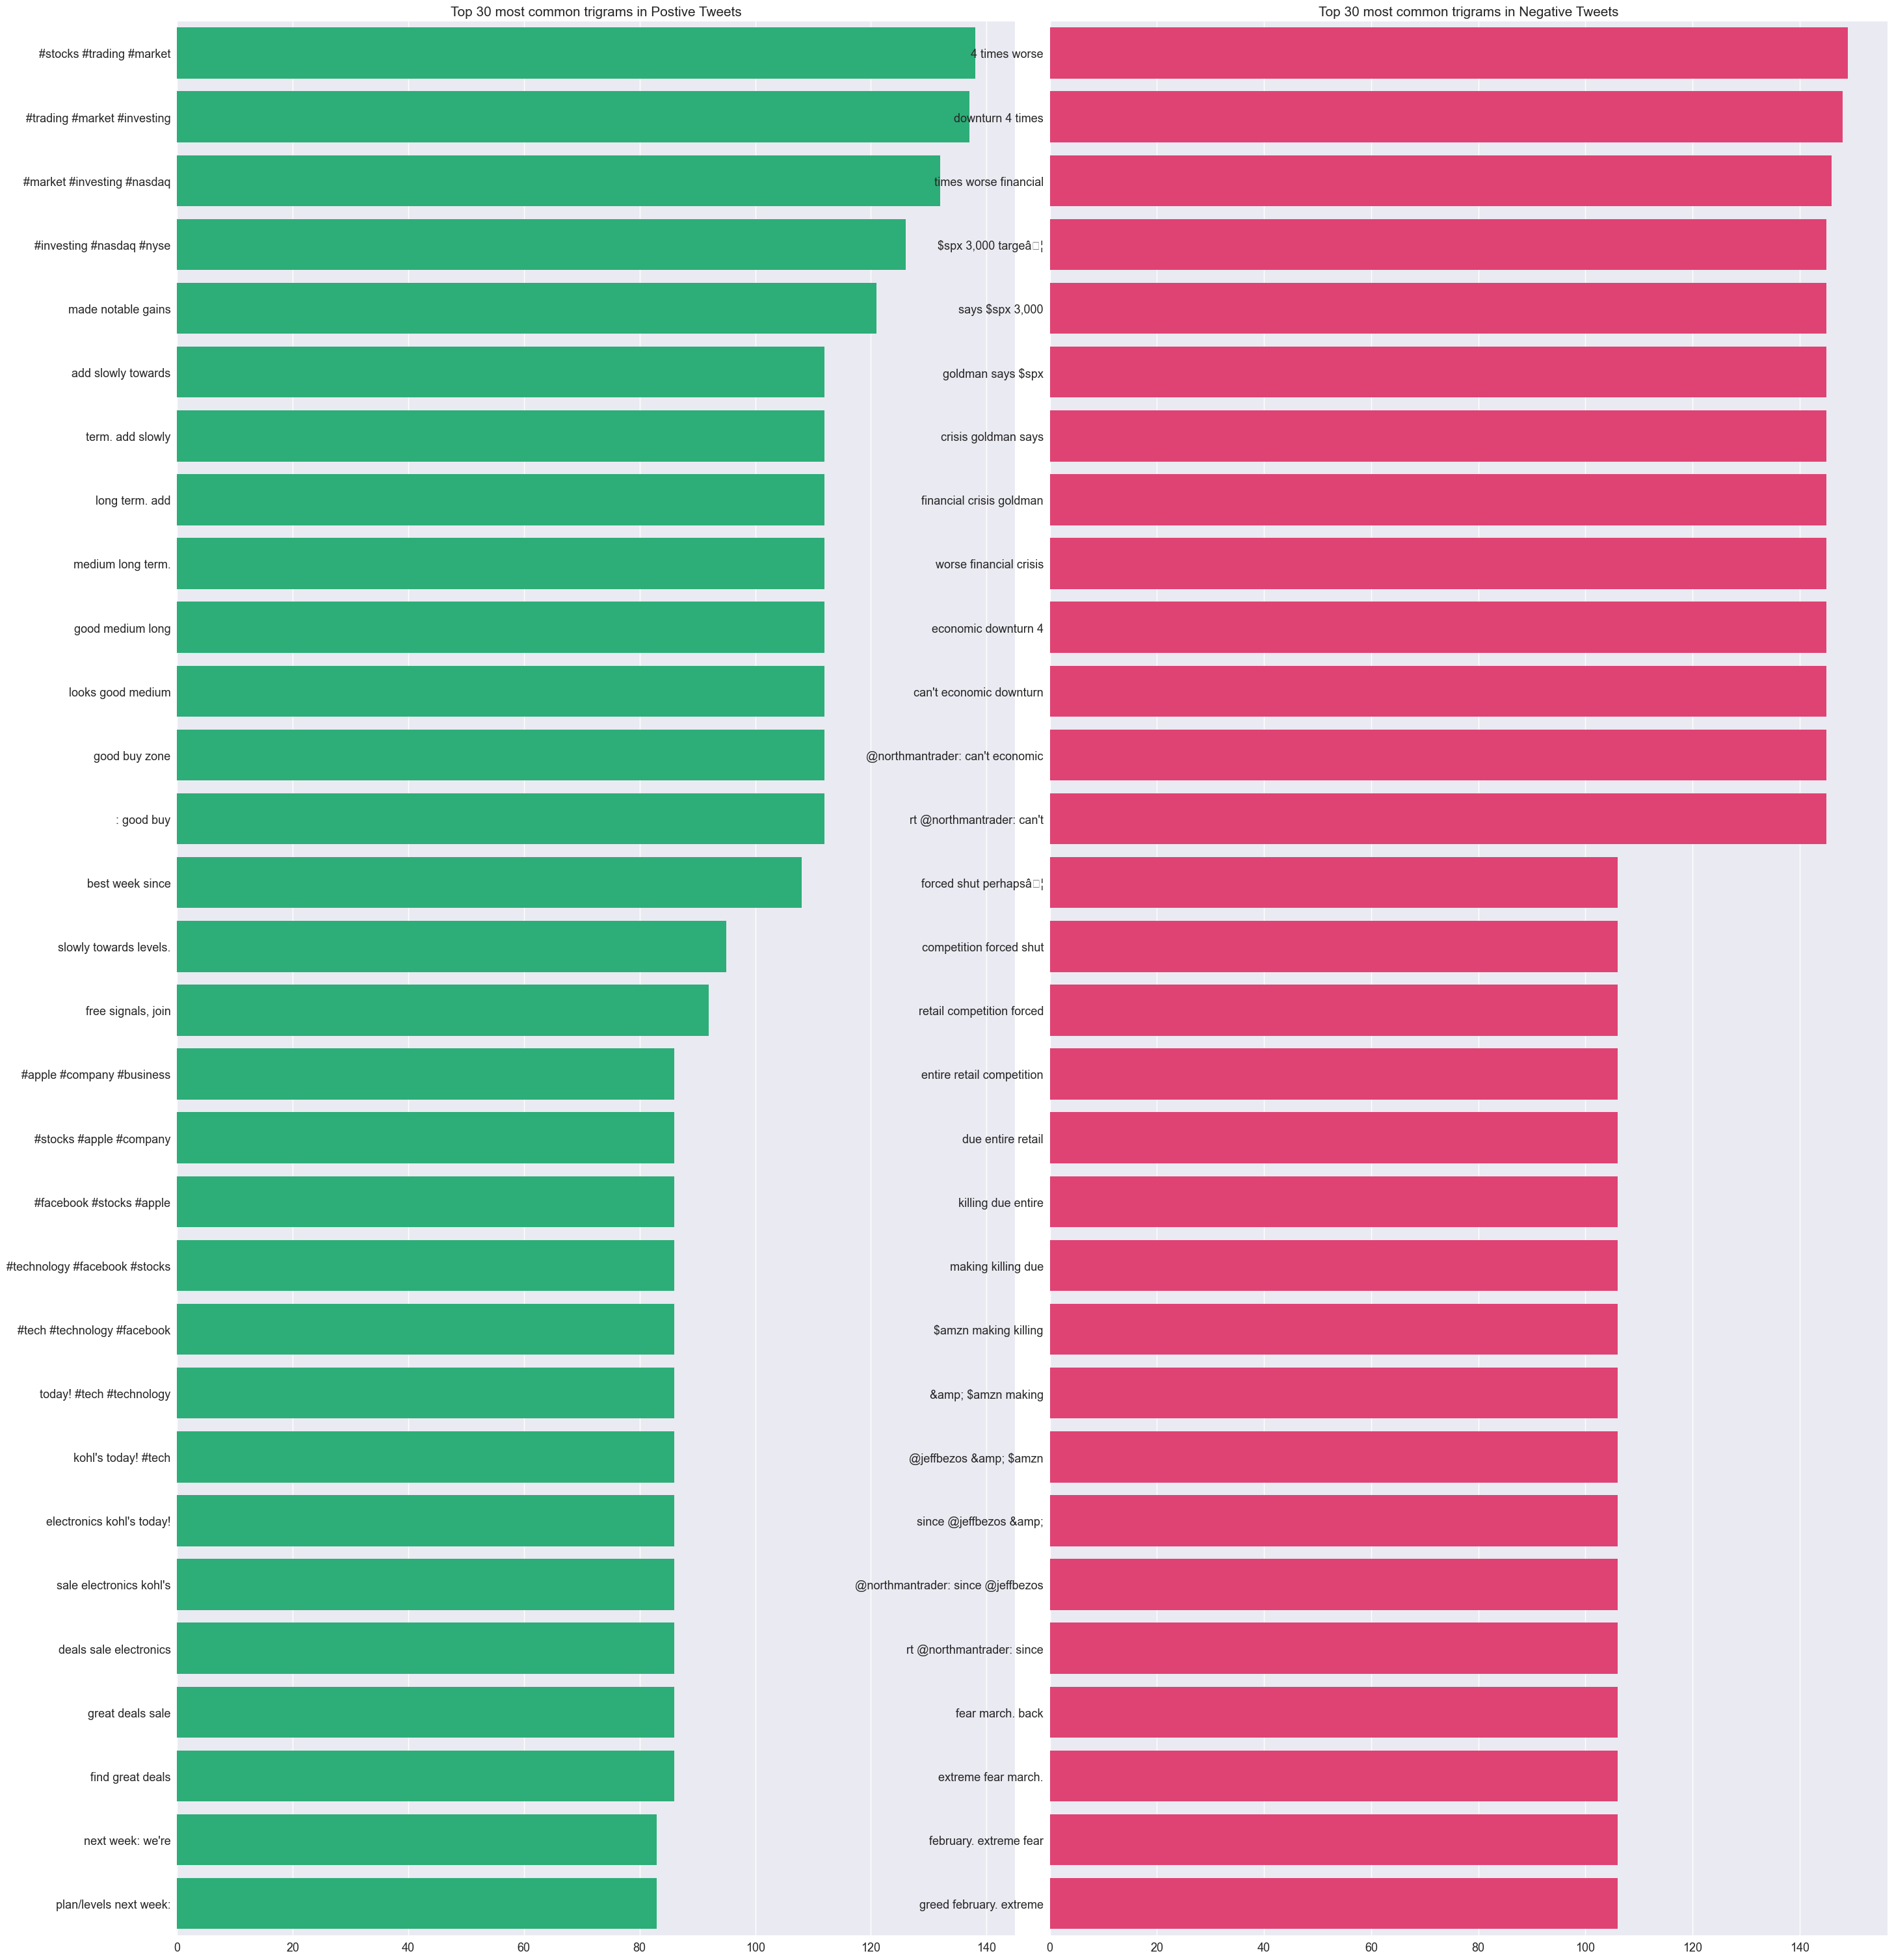

In [40]:
# Trigrams
positive_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in train[positive]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1
        
for tweet in train[negative]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1
        
      
        
df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='#F92969')



for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=15)

plt.show()

In [41]:
dffinal=df[["text","Sentiment"]]
dffinal

,text,Sentiment
0,rt northmantrad spx growth requir,Neutral
1,mro possibl gap fill today opec meet oxi uso b...,Neutral
2,race million subscrib amzn prime took year nfl...,Neutral
3,rt lmt spx high low curiou point âbear market ...,Neutral
4,rt reddogt spx keep hold weaker sector grind l...,Negative
...,...,...
22503,matt_cochran definit aapl even wors own crappi...,Negative
22504,rt trendspid goog goog hard bounc demand zone ...,Neutral
22505,rt joepet guess iâm lucki applecar support yea...,Positive
22506,msft microsoft rest consolid nice day particip...,Positive


In [42]:
df

,text,Sentiment,hash
0,rt northmantrad spx growth requir,Neutral,
1,mro possibl gap fill today opec meet oxi uso b...,Neutral,
2,race million subscrib amzn prime took year nfl...,Neutral,
3,rt lmt spx high low curiou point âbear market ...,Neutral,
4,rt reddogt spx keep hold weaker sector grind l...,Negative,
...,...,...,...
22503,matt_cochran definit aapl even wors own crappi...,Negative,
22504,rt trendspid goog goog hard bounc demand zone ...,Neutral,GOOG
22505,rt joepet guess iâm lucki applecar support yea...,Positive,
22506,msft microsoft rest consolid nice day particip...,Positive,


In [43]:


training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [44]:
print(len(df))

22508


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
countvector=CountVectorizer(ngram_range=(1,2))
#countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(training_data['text'].tolist())

In [46]:
# Perform feature selection on the countvector output
"""
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

k = 5000
countvector=CountVectorizer(ngram_range=(2,2))
traindataset = countvector.fit_transform(training_data['text'].tolist())
selector = SelectKBest(chi2, k=k)
traindataset_selected = selector.fit_transform(traindataset, training_data['Sentiment'])

# Get the indices of the selected features

# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [countvector.get_feature_names()[i] for i in feature_indices]
"""

"\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.feature_selection import SelectKBest, chi2\n\nk = 5000\ncountvector=CountVectorizer(ngram_range=(2,2))\ntraindataset = countvector.fit_transform(training_data['text'].tolist())\nselector = SelectKBest(chi2, k=k)\ntraindataset_selected = selector.fit_transform(traindataset, training_data['Sentiment'])\n\n# Get the indices of the selected features\n\n# Get the indices of the selected features\nfeature_indices = selector.get_support(indices=True)\n\n# Get the names of the selected features\nselected_feature_names = [countvector.get_feature_names()[i] for i in feature_indices]\n"

In [47]:
randomclassifier=RandomForestClassifier()
randomclassifier.fit(traindataset,training_data['Sentiment'])

RandomForestClassifier()

In [48]:
## Predict for the Test Dataset

test_dataset = countvector.transform(testing_data['text'].tolist())
predictions = randomclassifier.predict(test_dataset)

In [49]:
matrix=confusion_matrix(testing_data['Sentiment'],predictions)
print(matrix)
score=accuracy_score(testing_data['Sentiment'],predictions)
print(score)
report=classification_report(testing_data['Sentiment'],predictions)
print(report)

[[1252  188   66]
 [  64 1376   47]
 [  38  105 1366]]
0.8871612616614838
              precision    recall  f1-score   support

    Negative       0.92      0.83      0.88      1506
     Neutral       0.82      0.93      0.87      1487
    Positive       0.92      0.91      0.91      1509

    accuracy                           0.89      4502
   macro avg       0.89      0.89      0.89      4502
weighted avg       0.89      0.89      0.89      4502



In [50]:
model =   LinearSVC()
SVC=model.fit(traindataset,training_data['Sentiment'])

In [51]:
test_dataset = countvector.transform(testing_data['text'].tolist())
predictions = SVC.predict(test_dataset)
matrix=confusion_matrix(testing_data['Sentiment'],predictions)
print(matrix)
score=accuracy_score(testing_data['Sentiment'],predictions)
print(score)
report=classification_report(testing_data['Sentiment'],predictions)
print(report)

[[1367  108   31]
 [  79 1369   39]
 [  26   73 1410]]
0.9209240337627721
              precision    recall  f1-score   support

    Negative       0.93      0.91      0.92      1506
     Neutral       0.88      0.92      0.90      1487
    Positive       0.95      0.93      0.94      1509

    accuracy                           0.92      4502
   macro avg       0.92      0.92      0.92      4502
weighted avg       0.92      0.92      0.92      4502



In [52]:

model =   MultinomialNB()
NB=model.fit(traindataset,training_data['Sentiment'])

In [53]:
test_dataset = countvector.transform(testing_data['text'].tolist())
predictions = NB.predict(test_dataset)
matrix=confusion_matrix(testing_data['Sentiment'],predictions)
print(matrix)
score=accuracy_score(testing_data['Sentiment'],predictions)
print(score)
report=classification_report(testing_data['Sentiment'],predictions)
print(report)

[[1401   43   62]
 [ 227 1109  151]
 [ 103   46 1360]]
0.8596179475788538
              precision    recall  f1-score   support

    Negative       0.81      0.93      0.87      1506
     Neutral       0.93      0.75      0.83      1487
    Positive       0.86      0.90      0.88      1509

    accuracy                           0.86      4502
   macro avg       0.87      0.86      0.86      4502
weighted avg       0.87      0.86      0.86      4502



In [54]:
model=ExtraTreesClassifier()
ETC=model.fit(traindataset,training_data['Sentiment'])

In [55]:
test_dataset = countvector.transform(testing_data['text'].tolist())
predictions = ETC.predict(test_dataset)
matrix=confusion_matrix(testing_data['Sentiment'],predictions)
print(matrix)
score=accuracy_score(testing_data['Sentiment'],predictions)
print(score)
report=classification_report(testing_data['Sentiment'],predictions)
print(report)

[[1321  131   54]
 [  84 1363   40]
 [  42   89 1378]]
0.902265659706797
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      1506
     Neutral       0.86      0.92      0.89      1487
    Positive       0.94      0.91      0.92      1509

    accuracy                           0.90      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502



In [56]:
#############ensemble model
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Initialize SVM models with different hyperparameters
svm_model1 = SVC(kernel='linear', C=1.0)
svm_model2 = SVC(kernel='rbf', C=10.0, gamma=0.1)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)

# Combine models into an ensemble model
ensemble_model = VotingClassifier(estimators=[('svm1', svm_model1), ('svm2', svm_model2), ('rf', rf_model)])

# Train ensemble model on training data
ensemble_model.fit(traindataset,training_data['Sentiment'])



VotingClassifier(estimators=[('svm1', SVC(kernel='linear')),
                             ('svm2', SVC(C=10.0, gamma=0.1)),
                             ('rf', RandomForestClassifier(max_depth=5))])

In [57]:
test_dataset = countvector.transform(testing_data['text'].tolist())
predictions = ensemble_model.predict(test_dataset)
matrix=confusion_matrix(testing_data['Sentiment'],predictions)
print(matrix)
score=accuracy_score(testing_data['Sentiment'],predictions)
print(score)
report=classification_report(testing_data['Sentiment'],predictions)
print(report)

[[1311  154   41]
 [ 107 1336   44]
 [  71  103 1335]]
0.8844957796534874
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      1506
     Neutral       0.84      0.90      0.87      1487
    Positive       0.94      0.88      0.91      1509

    accuracy                           0.88      4502
   macro avg       0.89      0.88      0.88      4502
weighted avg       0.89      0.88      0.88      4502



In [58]:
##############Error Analysis


# Get indices of misclassified examples
misclassified_indices = [i for i, y_true, y_pred in zip(range(len(testing_data['Sentiment'])), testing_data['Sentiment'], predictions) if y_true != y_pred]

# Get misclassified examples
misclassified_examples = [traindataset[i] for i in misclassified_indices]

# Print misclassified examples and their predicted labels
for example, prediction in zip(misclassified_examples, predictions[misclassified_indices]):
    print(f"Example: {example}\nPredicted label: {prediction}\n")


Example:   (0, 4751)	1
  (0, 4754)	1
  (0, 14603)	1
  (0, 14606)	1
  (0, 22754)	1
  (0, 22822)	1
  (0, 27932)	1
  (0, 27974)	1
  (0, 30203)	1
  (0, 30307)	1
  (0, 38161)	1
  (0, 38220)	1
  (0, 52330)	1
  (0, 55231)	1
  (0, 55242)	1
  (0, 56071)	1
  (0, 56082)	1
  (0, 70594)	1
  (0, 70599)	1
  (0, 73187)	1
  (0, 73243)	1
  (0, 86174)	1
  (0, 86239)	1
  (0, 111293)	1
  (0, 111294)	1
  (0, 113226)	1
  (0, 114225)	1
  (0, 115586)	1
  (0, 115619)	1
Predicted label: Negative

Example:   (0, 4528)	1
  (0, 4531)	1
  (0, 10301)	1
  (0, 10411)	1
  (0, 11310)	1
  (0, 11317)	1
  (0, 58041)	1
  (0, 78685)	1
  (0, 78904)	1
  (0, 104540)	1
  (0, 104572)	1
  (0, 142222)	1
  (0, 142231)	1
Predicted label: Positive

Example:   (0, 6743)	1
  (0, 6777)	1
  (0, 14592)	1
  (0, 14593)	1
  (0, 15613)	1
  (0, 15614)	1
  (0, 18480)	1
  (0, 18571)	1
  (0, 32660)	1
  (0, 32901)	1
  (0, 64112)	2
  (0, 64115)	1
  (0, 64117)	1
  (0, 64406)	1
  (0, 64425)	1
  (0, 76775)	1
  (0, 78685)	1
  (0, 78712)	1
  (0, 80973)	1


In [59]:
#################grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load data


# Define parameter grid for SVM model
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# Initialize SVM model
svm_model = SVC()

# Initialize GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV object on training data
grid_search.fit(traindataset,training_data['Sentiment'])

# Get best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate model with best hyperparameters on test data
best_model = SVC(**best_params)
best_model.fit(traindataset,training_data['Sentiment'])
accuracy = best_model.score(test_dataset, testing_data['Sentiment'])


In [60]:
best_model.score(test_dataset, testing_data['Sentiment'])

0.9191470457574411